#  RecSys Jester dataset

Building a RecSys for the Jester dataset

This dataset is full of jokes (literally). It contains about 140 different jokes. The aim is building a RecSys so users will be recommend jokes suited to them.

**Researcher**<br>
David Kakanis - 500783676<br>

### Research question  
How can we create a personalized joke recommendation system using the Jester dataset that maximizes user satisfaction, measured by the user's joke ratings?

Sub-questions:

1. What are the characteristics of jokes with high ratings? Are there any common patterns in the joke text or length? How does the sentiment of the joke text relate to user ratings?
2. Do users with similar rating patterns have similar preferences for jokes? Can sentiment analysis of jokes help in identifying user preferences?
3. How does the performance of KNN and SVD collaborative filtering techniques compare in terms of recommendation accuracy and user satisfaction? Does incorporating sentiment analysis into the recommendation models improve their performance?
4. Which features are the most important in predicting a user's rating for a joke? Does the sentiment score play a significant role in determining user preferences?
5. Can the developed RecSys models provide meaningful explanations for their recommendations based on the joke content, user preferences, or sentiment analysis results?

### Introduction
The purpose of this data analysis is to develop a personalized joke recommendation system using the Jester dataset. By understanding users' preferences and the characteristics of jokes with high ratings, we can create a recommendation system that maximizes user satisfaction.

In order to draw valid conclusions and answer the main research question, we have formulated several sub-questions. These sub-questions will be answered by developing hypotheses and testing them using various statistical techniques and machine learning models, such as KNN and SVD collaborative filtering techniques.

By exploring these sub-questions and their results, we can better understand the factors that contribute to the success of a joke recommendation system and optimize it to provide the best possible user experience.

### Index
1. Data Cleaning and Preprocessing
2. Exploratory Data Analysis
3. Feature Engineering
4. Sentiment Analysis
5. Collaborative Filtering Models (KNN and SVD)
6. Model Evaluation and Comparison
7. Feature Importance Analysis
8. Model Explanation and Insights
9. Conclusion



# 1) Importing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
#open CSV file "C:\Users\User\iCloudDrive\Master DDB\RecSys\JesterDataset\jester_ratings.csv"

df1 = pd.read_csv(r"C:\Users\User\iCloudDrive\Master DDB\RecSys\JesterDataset\jester_ratings.csv", encoding='utf-8', delimiter=',')

In [4]:
df1.sample(10)

,userId,jokeId,rating
362834,13908,30,7.438
1287895,46460,13,-6.438
752394,31132,78,2.594
1528582,54876,110,-9.562
437757,17122,92,5.156
1358451,48358,110,-1.750
458112,17783,17,9.062
58791,1552,69,2.312
392720,15084,109,-9.344
1471609,52484,72,7.250


In [141]:
df2 = pd.read_csv(r"C:\Users\User\iCloudDrive\Master DDB\RecSys\JesterDataset\jester_items.csv", encoding='utf-8', delimiter=',')

In [6]:
df2.sample(10)

,jokeId,jokeText
68,69,"This guys wife asks, ""Honey if I died would yo..."
31,32,A man arrives at the gates of heaven. St. Pete...
127,128,"An American, a Scot and a Canadian were in a t..."
143,144,A man is driving in the country one evening wh...
39,40,How many Irishmen does it take to change a lig...
124,125,An American tourist goes into a restaurant in ...
149,150,"In an interview with David Letterman, Carter p..."
123,124,"Person 1: Hey, wanna hear a great knock-knock ..."
9,10,"Two cannibals are eating a clown, one turns to..."
92,93,"Reaching the end of a job interview, the human..."


# 2) Data Cleaning and Preprocessing

count     150.000000
mean      379.613333
std       286.383298
min        52.000000
25%       136.000000
50%       318.500000
75%       538.500000
max      1326.000000
Name: jokeText, dtype: float64

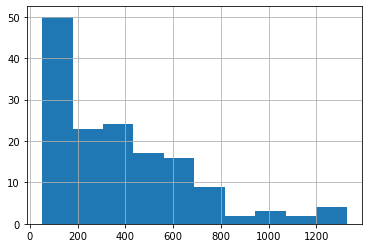

In [7]:
#jokeText in df2 i want to see full text
df2['jokeText'].str.len().hist()

df2['jokeText'].str.len().describe()

In [8]:
#An example of text from jokeText

df2['jokeText'][0]

'A man visits the doctor. The doctor says "I have bad news for you.You have\ncancer and Alzheimer\'s disease". \nThe man replies "Well,thank God I don\'t have cancer!"\n'

In [142]:
data = df1.merge(df2, on='jokeId')


In [10]:
data.sample(10)

,userId,jokeId,rating,jokeText
938502,53047,127,9.938,"A little boy goes to his dad and asks, ""What i..."
435624,60260,19,1.781,Q: If a person who speaks three languages is c...
981767,32907,62,7.750,A group of managers were given the assignment...
1728047,47447,148,-4.969,"Recently a teacher, a garbage collector, and a..."
25782,27340,7,6.844,How many feminists does it take to screw in a ...
176885,3595,15,-8.969,Q: What did the blind person say when given s...
1697212,36971,145,0.781,"A blonde, brunette, and a red head are all lin..."
348044,15583,18,-9.656,A dog walks into Western Union and asks the cl...
219408,52325,15,-7.406,Q: What did the blind person say when given s...
893126,26594,69,-6.844,"This guys wife asks, ""Honey if I died would yo..."


In [143]:
data.to_parquet('jester.parquet')

# 3) Exploratory Data Analysis (EDA)

In [ ]:
# Calculate summary statistics for the ratings
print("Ratings summary statistics:")
print(data['rating'].describe())

# Calculate average ratings for jokes
average_ratings = data.groupby('jokeId')['rating'].mean()

# Identify the highest-rated jokes
highest_rated_jokes = average_ratings.sort_values(ascending=False).head(10)
print("Top 10 highest-rated jokes:")
print(highest_rated_jokes)

# Analyze the relationship between the length of the joke text and the rating
data['joke_text_length'] = data['jokeText'].apply(len)
sns.jointplot(x='joke_text_length', y='rating', data=data, kind='scatter')


Ratings summary statistics:
count    1.761439e+06
mean     1.618602e+00
std      5.302608e+00
min     -1.000000e+01
25%     -2.031000e+00
50%      2.219000e+00
75%      5.719000e+00
max      1.000000e+01
Name: rating, dtype: float64


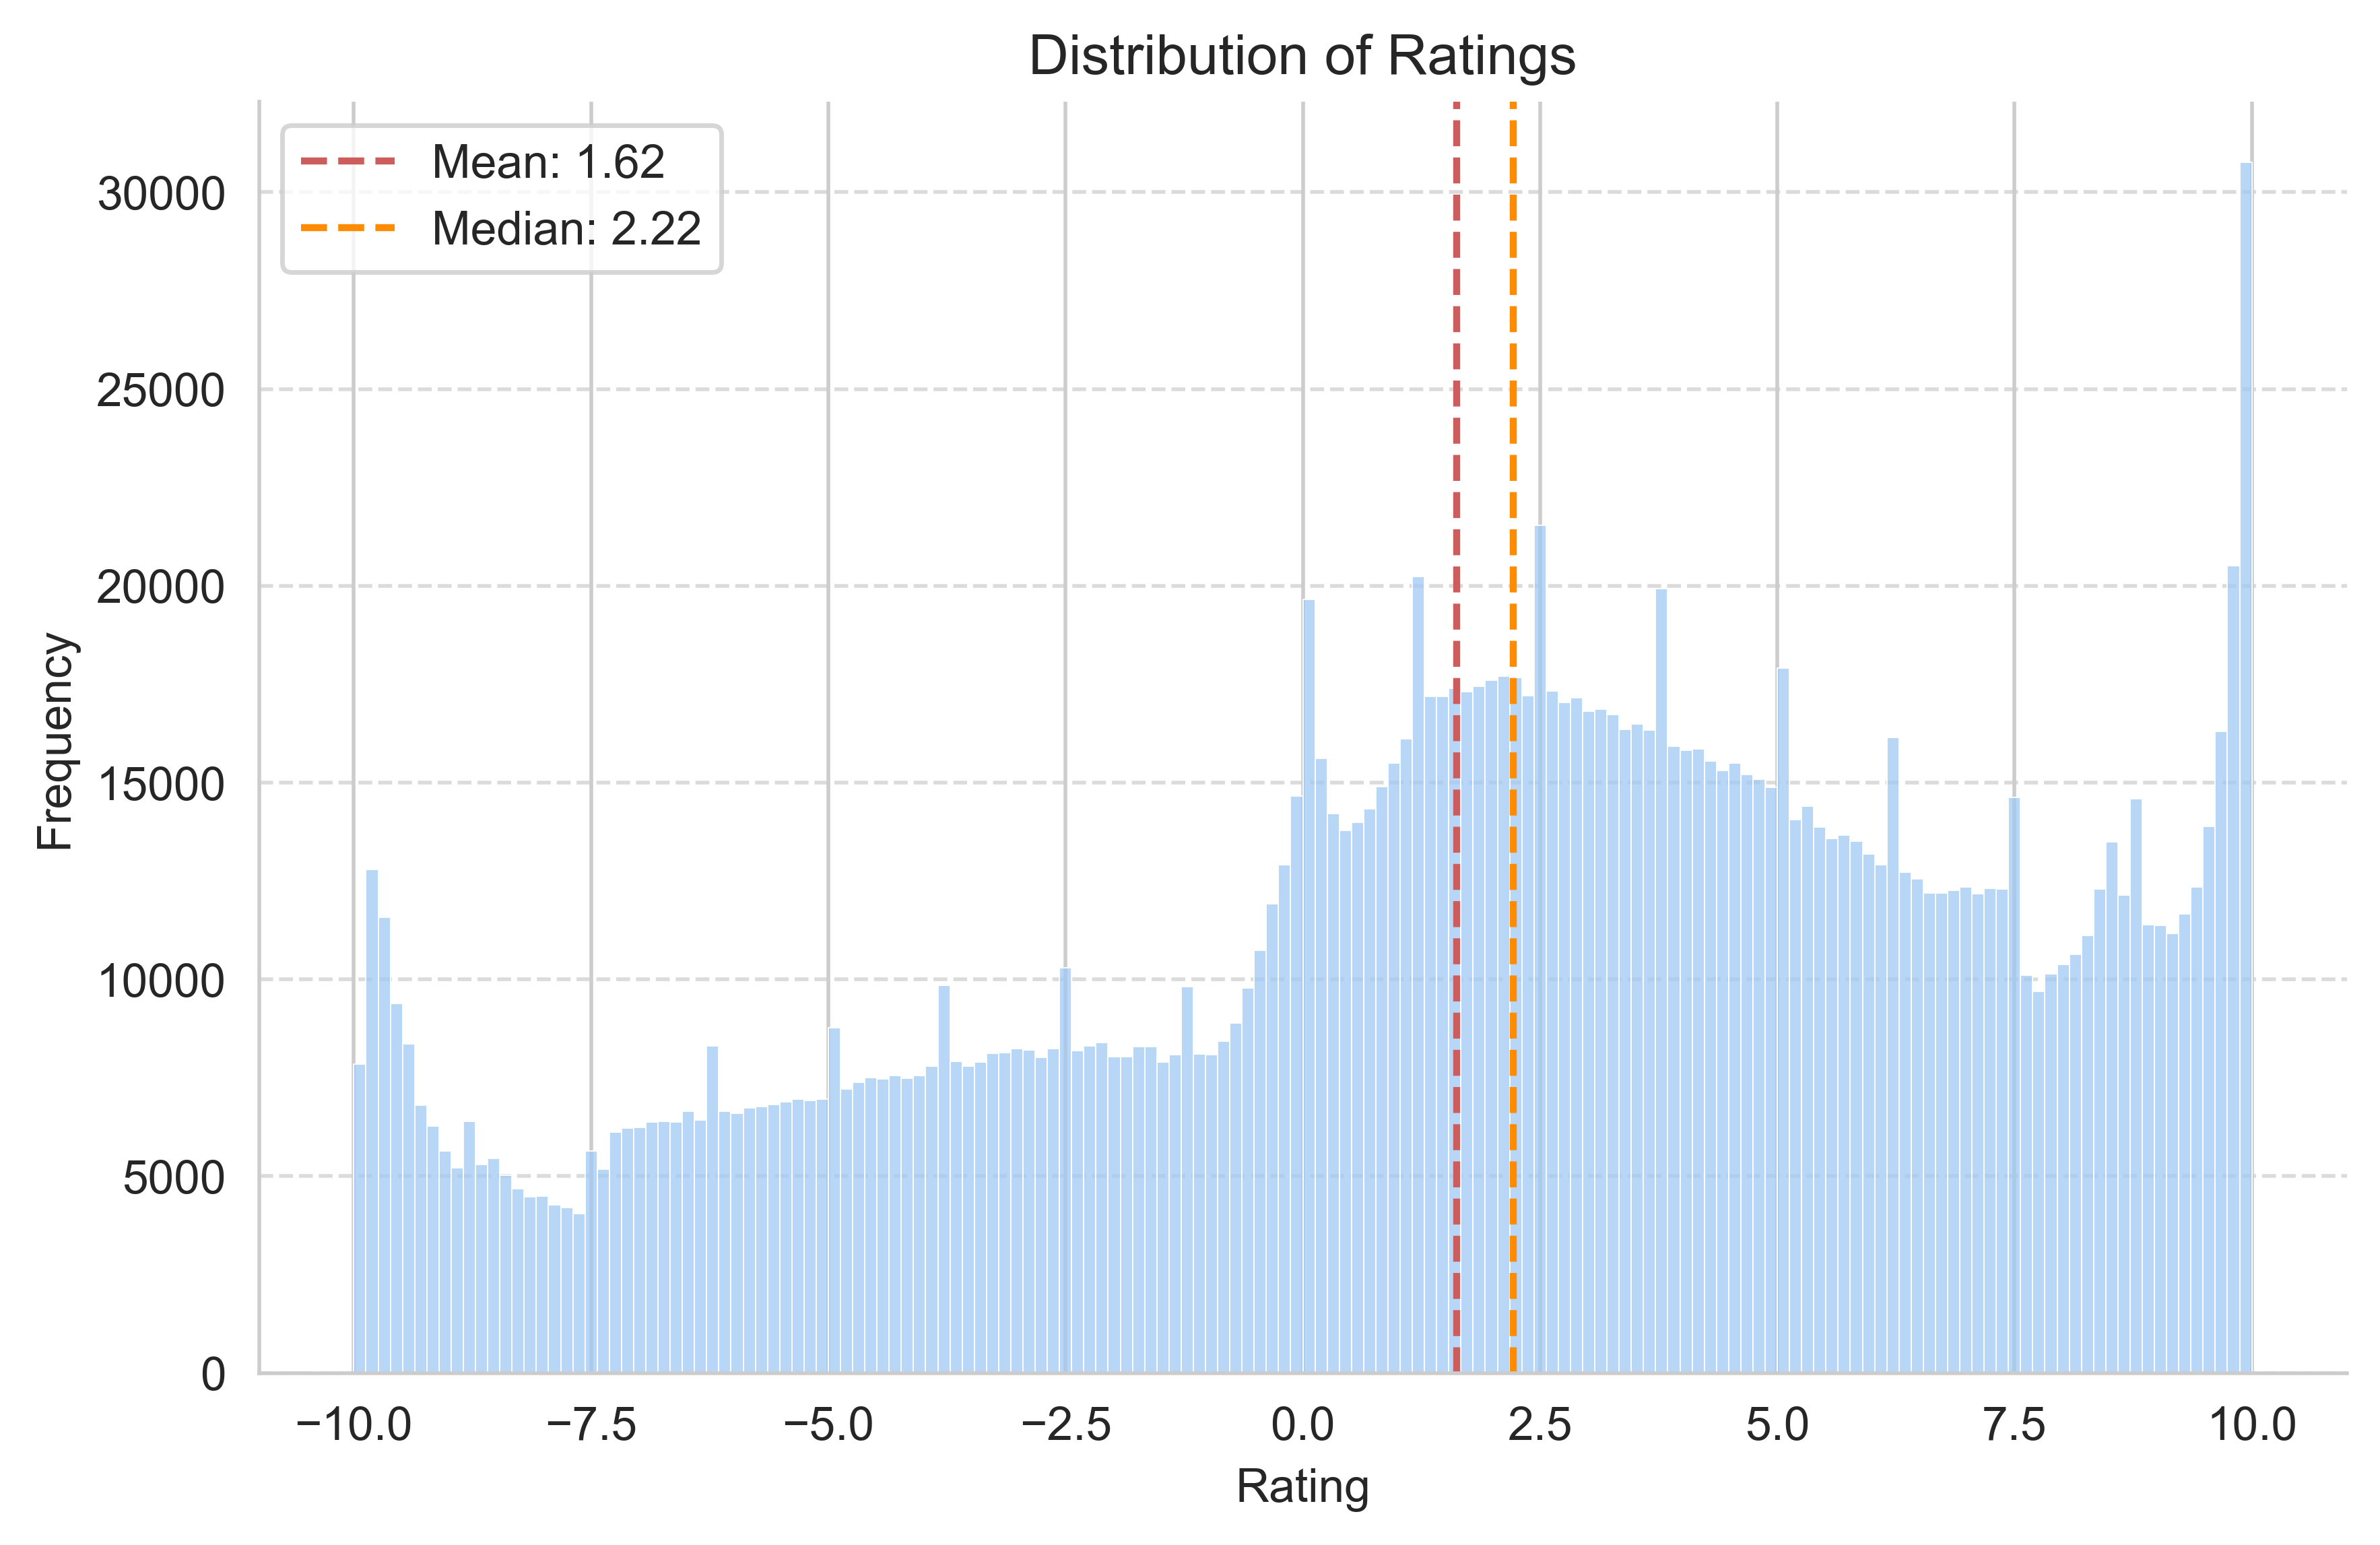

Top 10 highest-rated jokes:
jokeId
53     3.714381
105    3.711223
89     3.606506
129    3.583496
35     3.560305
72     3.505712
32     3.504739
104    3.422796
68     3.387269
106    3.337933
Name: rating, dtype: float64


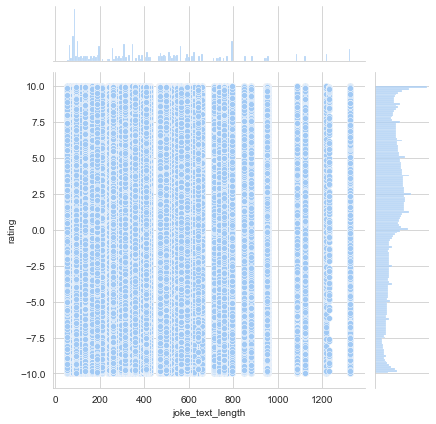

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is in a variable called 'data'
# data = ...

# Set style and color palette
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Visualize the distribution of ratings using a histogram
fig, ax = plt.subplots(figsize=(8, 5), dpi=500)
sns.histplot(data['rating'], kde=False, ax=ax)

# Set x and y labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Ratings')

# Remove spines on the right and top sides
sns.despine(right=True, top=True)

# Add mean and median lines
mean = data['rating'].mean()
median = data['rating'].median()
ax.axvline(mean, color='indianred', linestyle='--', label=f'Mean: {mean:.2f}')
ax.axvline(median, color='darkorange', linestyle='--', label=f'Median: {median:.2f}')
ax.legend()

# Add gridlines and adjust tick labels
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


plt.show()


# 4) Adding sentiment analysis

In [13]:
from textblob import TextBlob

In [14]:
# Assuming your dataset is in a DataFrame called df
# Perform sentiment analysis on the 'jokeText' column
data['sentiment'] = data['jokeText'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [15]:
# Display the updated DataFrame with sentiment scores
data.head(10)

,userId,jokeId,rating,jokeText,sentiment
0,1,5,0.219,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
1,2,5,-9.688,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
2,3,5,-9.844,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
3,4,5,-5.812,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
4,5,5,6.906,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
5,6,5,-0.031,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
6,7,5,-2.906,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
7,8,5,6.219,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
8,9,5,8.250,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
9,10,5,-5.750,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0


In [16]:
#make new dataframe with only jokeId and sentiment

data2 = data[['jokeId', 'sentiment']]
data2.sample(10)

,jokeId,sentiment
365692,18,0.005177
476656,25,0.000000
1554857,131,-0.061222
360875,18,0.005177
324333,17,0.450000
510014,50,0.241667
398016,19,0.000000
164734,13,0.000000
1145867,44,-0.050000
1445694,114,-0.066667


In [20]:
#save data to parquet

data.to_parquet('jester2.parquet')

In [3]:
#load data from parquet

data = pd.read_parquet('jester2.parquet')

In [18]:
# Calculate average sentiment for jokes
average_sentiment = data2.groupby('jokeId')['sentiment'].mean()

# Identify the most positive jokes
most_positive_jokes = average_sentiment.sort_values(ascending=False).head(10)
print("Top 10 most positive jokes:", most_positive_jokes)

# Identify the most negative jokes
most_negative_jokes = average_sentiment.sort_values(ascending=True).head(10)
print("Top 10 most negative jokes:", most_negative_jokes)

# Calculate average ratings for jokes
average_ratings = data.groupby('jokeId')['rating'].mean()

Top 10 most positive jokes: jokeId
146    1.000000
43     0.800000
80     0.750000
22     0.750000
108    0.688095
124    0.641667
90     0.625000
57     0.500000
17     0.450000
85     0.433333
Name: sentiment, dtype: float64
Top 10 most negative jokes: jokeId
15    -0.500000
132   -0.445833
59    -0.266667
121   -0.265079
138   -0.250000
61    -0.235786
104   -0.221667
111   -0.194602
56    -0.181934
92    -0.180000
Name: sentiment, dtype: float64


In [19]:
# Calculate the correlation between the sentiment and rating
correlation = data['sentiment'].corr(data['rating'])
print(f"Correlation between sentiment and rating: {correlation:.2f}")

Correlation between sentiment and rating: 0.02


In [28]:
#count amount of sentiment with 0.00

data['sentiment'].value_counts(0)

 0.000000    413777
 0.258333     63728
-0.500000     54932
 0.450000     53357
 0.005177     51587
              ...  
 0.281481       368
-0.235786       222
 0.102806       166
 0.136364       166
 0.800000       166
Name: sentiment, Length: 103, dtype: int64

In [21]:
# Create bins with a step of 0.2
bins = pd.cut(data['sentiment'], bins=[-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0])

# Calculate the value counts for each bin
sentiment_counts = data.groupby(bins)['sentiment'].count()

# Calculate the percentage of each bin
sentiment_percentages = sentiment_counts / data.shape[0] * 100

# Print the sentiment percentages
print(sentiment_percentages)


sentiment
(-1.0, -0.8]     0.000000
(-0.8, -0.6]     0.000000
(-0.6, -0.4]     4.036927
(-0.4, -0.2]     3.165934
(-0.2, 0.0]     40.752192
(0.0, 0.2]      31.862017
(0.2, 0.4]      14.326922
(0.4, 0.6]       3.610173
(0.6, 0.8]       1.966915
(0.8, 1.0]       0.278920
Name: sentiment, dtype: float64


In [4]:
data.head()

,userId,jokeId,rating,jokeText,sentiment
0,1,5,0.219,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
1,2,5,-9.688,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
2,3,5,-9.844,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
3,4,5,-5.812,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0
4,5,5,6.906,Q.\tWhat's O. J. Simpson's Internet address? \...,0.0


# 4) Feature Engineering

# 4) Analysis

In [108]:
#how many jokes are rated by a random user

data['userId'].value_counts(0)

#how many jokes are rated by a random user

data['userId'].value_counts(0)

304      140
476      140
477      140
701      140
227      140
        ... 
55059      1
55073      1
5149       1
16389      1
3394       1
Name: userId, Length: 59132, dtype: int64

In [160]:
data.head()


,userId,jokeId,rating,jokeText
0,1,5,0.219,Q.\tWhat's O. J. Simpson's Internet address? \...
1,2,5,-9.688,Q.\tWhat's O. J. Simpson's Internet address? \...
2,3,5,-9.844,Q.\tWhat's O. J. Simpson's Internet address? \...
3,4,5,-5.812,Q.\tWhat's O. J. Simpson's Internet address? \...
4,5,5,6.906,Q.\tWhat's O. J. Simpson's Internet address? \...


### KNN

In [133]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
#import csr_matrix
from scipy.sparse import csr_matrix

In [171]:
matrix = data.pivot(index='jokeId', columns='userId', values='rating').fillna(0)
print(matrix.shape)

(140, 59132)


In [172]:
matrix.sample(10)

userId,1,2,3,4,5,6,7,8,9,10,...,63969,63970,63971,63972,63973,63974,63975,63976,63977,63978
jokeId,,,,,,,,,,,,,,,,,,,,,
124,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,-9.031
73,0.000,0.000,0.0,0.0,3.562,0.000,0.0,-1.000,0.0,0.156,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000
141,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,-8.312
86,0.000,0.000,0.0,0.0,0.344,0.000,0.0,1.094,0.0,1.469,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,-4.969
132,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,4.875,0.0,0.0,0.0,0.0,8.625
52,0.062,0.000,0.0,0.0,1.062,-4.812,0.0,6.094,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000
28,0.000,9.812,0.0,0.0,2.281,0.000,0.0,-1.969,0.0,1.406,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,7.969
125,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,8.750
129,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,6.875


In [173]:
# Convert the pivot table to a sparse matrix
matrix_matrix=csr_matrix(matrix.values)

In [174]:
# count amount of 0 in matrix and make it a percentage

matrix.isin([0]).sum().sum() / matrix.size * 100


78.76953257119665

In [175]:
# Hyperparameter tuning nearest neighbors
algorithm = ['brute']
n_neighbors = [4, 5,6, 7,8 ,9, 10, 15, 20, 25, 30]
metric = ['cosine', 'euclidean', 'manhattan']

#writing for loops but do not use ball tree for cosine metric
for i in n_neighbors:
    for k in metric:
            for j in algorithm:
                model_knn = NearestNeighbors(metric=k, algorithm=j , n_neighbors=i, n_jobs=-1)
                model_knn.fit(matrix_matrix)
                distances, indices = model_knn.kneighbors(matrix_matrix, n_neighbors=i)
            print(f'kneighbors: {i}, algorithm: {j}, metric: {k}, distances: {distances.mean()}')

kneighbors: 4, algorithm: brute, metric: cosine, distances: 0.4181264724640538
kneighbors: 4, algorithm: brute, metric: euclidean, distances: 417.7117213781373
kneighbors: 4, algorithm: brute, metric: manhattan, distances: 41660.00628571426
kneighbors: 5, algorithm: brute, metric: cosine, distances: 0.4529817129222006
kneighbors: 5, algorithm: brute, metric: euclidean, distances: 446.7453819498219
kneighbors: 5, algorithm: brute, metric: manhattan, distances: 44763.77286714284
kneighbors: 6, algorithm: brute, metric: cosine, distances: 0.4783695313522907
kneighbors: 6, algorithm: brute, metric: euclidean, distances: 466.3470508060327
kneighbors: 6, algorithm: brute, metric: manhattan, distances: 46884.72999523809
kneighbors: 7, algorithm: brute, metric: cosine, distances: 0.4982159660968602
kneighbors: 7, algorithm: brute, metric: euclidean, distances: 480.47252375232955
kneighbors: 7, algorithm: brute, metric: manhattan, distances: 48438.753438775515
kneighbors: 8, algorithm: brute, m

In [176]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(matrix_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [181]:
#make a function to get the average rating of a movie
def get_average_rating(jokeId):
    return data[data['jokeId'] == jokeId]['rating'].mean()

In [182]:
def get_recommendations(jokeId=None):
    if jokeId is None:
        query_index = np.random.choice(matrix.shape[0])
    else:
        query_index = matrix.index.get_loc(jokeId)
        
    distances, indices = model_knn.kneighbors(matrix.iloc[query_index, :].values.reshape(1, -1), n_neighbors = 10)

    joke_id = matrix.index[query_index]

    print("Joke:", data[data['jokeId'] == joke_id]['jokeText'].values[0])
    print("Top 10 similar jokes:")

    for i in range(1, len(distances.flatten())):  # Start from 1 to skip the joke itself
        recommended_joke_id = matrix.index[indices.flatten()[i]]
        recommended_joke_text = data[data['jokeId'] == recommended_joke_id]['jokeText'].values[0]
        distance = distances.flatten()[i]
        avg_rating = get_average_rating(recommended_joke_id)
        print(f"{i}: {recommended_joke_text}, with an average rating of: {avg_rating:.2f}, with distance of {distance:.5f}")

In [195]:
# Call the get_recommendations function
get_recommendations()

Joke: Q:  What did the blind person say when given some matzah?

A:  Who the hell wrote this?

Top 10 similar jokes:
1: Q. What is orange and sounds like a parrot?  

A. A carrot.
, with an average rating of: -1.59, with distance of 0.63380
2: They asked the Japanese visitor if they have elections in his
country.  
"Every Morning" he answers.
, with an average rating of: -0.59, with distance of 0.63912
3: How many feminists does it take to screw in a light bulb?
That's not funny.
, with an average rating of: -1.81, with distance of 0.64113
4: Q. Did you hear about the dyslexic devil worshiper? 

A. He sold his soul to Santa.
, with an average rating of: -0.67, with distance of 0.68236
5: A dog walks into Western Union and asks the clerk to send a telegram. He fills out a form on which he
writes down the telegram he wishes to send: "Bow wow wow, Bow wow wow."

The clerk says, "You can add another 'Bow wow' for the same price."

The dog responded, "Now wouldn't that sound a little silly?

In [194]:
def get_random_joke():
    joke_id = np.random.choice(data['jokeId'].unique())
    joke_text = data[data['jokeId'] == joke_id]['jokeText'].values[0]
    return joke_id, joke_text


def recommend_jokes_based_on_rating(joke_id, rating, n_jokes=3):
    user_temp = pd.DataFrame({'user_id': [-1] * len(data['jokeId'].unique()),
                              'jokeId': data['jokeId'].unique(),
                              'rating': 0})
    user_temp.loc[user_temp['jokeId'] == joke_id, 'rating'] = rating
    
    user_temp_matrix = user_temp.pivot_table(index='user_id', columns='jokeId', values='rating').fillna(0)
    full_matrix = pd.concat([matrix, user_temp_matrix])
    
    # Ensure the matrix does not contain any NaN values
    full_matrix.fillna(0, inplace=True)

    model_knn_temp = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
    model_knn_temp.fit(full_matrix)
    
    distances, indices = model_knn_temp.kneighbors(full_matrix.iloc[-1, :].values.reshape(1, -1), n_neighbors=n_jokes+1)
    
    recommended_joke_ids = full_matrix.index[indices.flatten()]
    recommended_joke_ids = recommended_joke_ids[1:]  # Skip the first joke since it's the one that was just rated
    
    return recommended_joke_ids



# Get a random joke
joke_id, joke_text = get_random_joke()
print("Here's a joke for you:\n", joke_text)

# Get user rating
rating = int(input("Please rate the joke from -10 to 10: "))

# Recommend three more jokes based on user rating
recommended_joke_ids = recommend_jokes_based_on_rating(joke_id, rating)

print("\nBased on your rating, here are three more jokes for you:")
for idx, rec_joke_id in enumerate(recommended_joke_ids):
    rec_joke_text = data[data['jokeId'] == rec_joke_id]['jokeText'].values[0]
    print(f"{idx+1}. {rec_joke_text}")



Here's a joke for you:
 Q. Did you hear about the dyslexic devil worshiper? 

A. He sold his soul to Santa.


Based on your rating, here are three more jokes for you:
1. Q: How many programmers does it take to change a lightbulb?

A: NONE!   That's a hardware problem....

2. Q: What is the difference between George  Washington, Richard Nixon,
and Bill Clinton?

A: Washington couldn't tell a lie, Nixon couldn't   tell the truth, and
Clinton doesn't know the difference.

3. What is the rallying cry of the International Dyslexic Pride movement?
Dyslexics Untie!



### SVD

In [23]:
user_item_matrix = data.pivot_table(index='jokeId', columns='userId', values='rating')

In [24]:
mean_user_rating = user_item_matrix.mean(axis=1)
normalized_user_item_matrix = user_item_matrix.sub(mean_user_rating, axis=0)

In [25]:
normalized_user_item_matrix = normalized_user_item_matrix.fillna(0)

In [26]:
U, sigma, Vt = np.linalg.svd(normalized_user_item_matrix, full_matrices=False)

In [27]:
k = 50
U_k = U[:, :k]
sigma_k = np.diag(sigma[:k])
Vt_k = Vt[:k, :]

In [28]:
predicted_normalized_user_item_matrix = np.dot(np.dot(U_k, sigma_k), Vt_k)
predicted_user_item_matrix = pd.DataFrame(predicted_normalized_user_item_matrix, index=user_item_matrix.index, columns=user_item_matrix.columns)

In [29]:
predicted_user_item_matrix = predicted_user_item_matrix.add(mean_user_rating, axis=0)

In [30]:
def get_recommendations(user_id, n_recommendations=10):
    # Get the list of jokeIds the user has already rated
    rated_jokes = data[data['userId'] == user_id]['jokeId'].tolist()

    # Get the list of all jokeIds
    all_jokes = data['jokeId'].unique()

    # Remove the rated jokeIds from the list of all jokeIds
    unrated_jokes = [joke_id for joke_id in all_jokes if joke_id not in rated_jokes]

    # Get predicted ratings for all unrated jokeIds
    predicted_ratings = predicted_user_item_matrix.loc[user_id, unrated_jokes]

    # Sort the predicted ratings in descending order
    sorted_predicted_ratings = predicted_ratings.sort_values(ascending=False)

    # Get the top n_recommendations jokeIds
    recommended_joke_ids = sorted_predicted_ratings.index[:n_recommendations]

    # Get the joke texts for the recommended jokeIds
    recommendations = data[data['jokeId'].isin(recommended_joke_ids)]['jokeText']

    return recommendations

In [127]:
user_id = 1
n_recommendations = 10
recommended_jokes = get_recommendations(user_id, n_recommendations)
print(recommended_jokes)

KeyError: 1